In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [69]:
df = pd.read_csv('churn_data.csv', 
index_col = 'customerID')
df.head(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


In [71]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

## check for outliers

<Axes: >

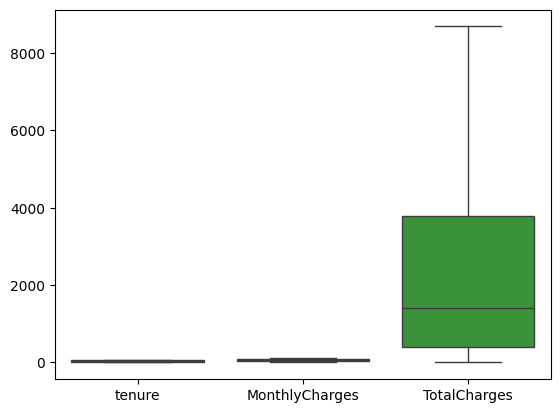

In [72]:
sns.boxplot(data=df)

## Print columns with outliers if any

In [73]:

for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    outliers = df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]
    if outliers.shape[0] > 0:
        print(outliers)
    else:
        print(f' {column} has no outliers ')

 tenure has no outliers 
 MonthlyCharges has no outliers 
 TotalCharges has no outliers 


## Checking missing values

In [74]:
df.isna().sum()

tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [75]:
# fill missing values with mean
df.fillna(df['TotalCharges'].mean(), inplace=True)

df.isna().sum()

tenure            0
PhoneService      0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

## Convert columns to numeric

In [76]:
dict = {'Yes': 1, 'No': 0}

In [83]:
df['PhoneService'] = df['PhoneService'].replace(dict)


In [84]:
df['Churn'] = df['Churn'].replace(dict)

In [79]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 3,'Mailed check': 2,'Bank transfer (automatic)': 1,'Credit card (automatic)': 0})

In [80]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [85]:
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,3,29.85,29.85,0
5575-GNVDE,34,1,1,2,56.95,1889.50,0
3668-QPYBK,2,1,0,2,53.85,108.15,1
7795-CFOCW,45,0,1,1,42.30,1840.75,0
9237-HQITU,2,1,0,3,70.70,151.65,1
...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,2,84.80,1990.50,0
2234-XADUH,72,1,1,0,103.20,7362.90,0
4801-JZAZL,11,0,0,3,29.60,346.45,0


## Feature Engineering

In [86]:
df[df['tenure'] == 0]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
4472-LVYGI,0,0,2,1,52.55,2283.300441,0
3115-CZMZD,0,1,2,2,20.25,2283.300441,0
5709-LVOEQ,0,1,2,2,80.85,2283.300441,0
4367-NUYAO,0,1,2,2,25.75,2283.300441,0
1371-DWPAZ,0,0,2,0,56.05,2283.300441,0
7644-OMVMY,0,1,2,2,19.85,2283.300441,0
3213-VVOLG,0,1,2,2,25.35,2283.300441,0
2520-SGTTA,0,1,2,2,20.00,2283.300441,0
2923-ARZLG,0,1,1,2,19.70,2283.300441,0


## Making sure the feature doesn't contain infinity values

In [ ]:

df.loc[df['tenure'] == 0, 'tenure'] = np.nan

df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [92]:
df['TotalCharges_Tenure_Ratio'] = df['TotalCharges'] / df['tenure']

## Histogram of TotalCharges to Tenure ratio

## 

<Axes: xlabel='TotalCharges_Tenure_Ratio', ylabel='Count'>

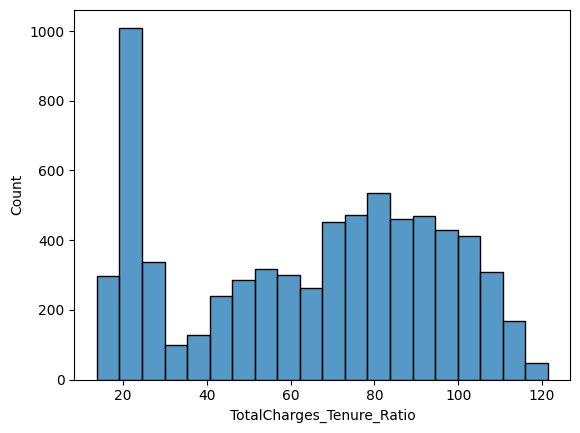

In [93]:
sns.histplot(data=df, x='TotalCharges_Tenure_Ratio')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tenure                       7043 non-null   int64  
 1   PhoneService                 7043 non-null   int64  
 2   Contract                     7043 non-null   int64  
 3   PaymentMethod                7043 non-null   int64  
 4   MonthlyCharges               7043 non-null   float64
 5   TotalCharges                 7043 non-null   float64
 6   Churn                        7043 non-null   int64  
 7   MonthlyCharges_Tenure_Ratio  7043 non-null   float64
 8   TotalyCharges_Tenure_Ratio   7043 non-null   float64
 9   TotalCharges_Tenure_Ratio    7043 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 863.3+ KB


In [95]:
df.to_csv('cleaned_churn_data.csv')

## Summary

We conducted data cleaning and feature engineering on the churn dataset. Initially, we examined the dataset for outliers using the Interquartile Range (IQR) method, finding no outliers present. However, we identified missing values in the TotalCharges column and addressed them by replacing them with the mean due to the skewed distribution.

Categorical columns were then transformed into numeric data types via label encoding, assigning a unique number to each value. Additionally, a new feature was engineered representing the charge per tenure, computed by dividing 'TotalCharges' by 'tenure'. During this process, we discovered some 'tenure' values of 0, which were treated as missing values, replaced with NaN, and subsequently filled with the median value before generating the new feature. 

The preprocessed data was saved in csv file